In [1]:
import pandas as pd
import numpy as np

import warnings
from datasets import Dataset, DatasetDict

from transformers import AutoTokenizer
import evaluate
import wandb
import ast
import os
warnings.filterwarnings("ignore")


train_data = pd.read_csv('train_data.csv')
train_data

,processed_text,target_labels_positions
0,аа союзная тридцать пять дробь один лариса сое...,{}
1,аа приложение мне показывает к оплате у меня п...,{}
2,да лисное по призрак лишнее ну почему иду пять...,"{'I-value': [140], 'B-value': [139], 'B-discou..."
3,а что добрый день NAME у меня пришел какой то ...,{'B-discount': [12]}
4,у меня западный с утра да да еще да да самый в...,{}
...,...,...
3394,а доброе утро меня заинтересовала ваш проект н...,"{'I-value': [224, 225], 'B-value': [223], 'B-d..."
3395,здравствуйте меня зовут иван я бы хотел сегодн...,{}
3396,целенаправлен на голосовой почтовый ящик вы мо...,{}
3397,NAME зовут NAME я хотела уточнить ээ своего ме...,{}


In [2]:
dataset = Dataset.from_pandas(train_data)
#dataset = dataset.shuffle()
dataset_train_test = dataset.train_test_split(test_size=0.2)

final_ds = DatasetDict(
    {
        "train": dataset_train_test["train"],
        "test": dataset_train_test["test"],
    }
)
final_ds

DatasetDict({
    train: Dataset({
        features: ['processed_text', 'target_labels_positions'],
        num_rows: 2719
    })
    test: Dataset({
        features: ['processed_text', 'target_labels_positions'],
        num_rows: 680
    })
})

In [3]:
for i in final_ds["train"]:
    labels = ast.literal_eval(i["target_labels_positions"])
    if len(labels) > 0:
        print(i["target_labels_positions"])
        print(i['processed_text'])
        print('====================================')

{'I-value': [23], 'B-value': [22], 'B-discount': [21]}
а был просмотр ну в понедельник будем уточнять сейчас просмотр окончательное решение скажем да вы мне скажите мне на это пришла скидка тридцать тысяч вы там тоже напишите что нам скидка потому что вот нам пришла смска тита тридцать три на актуально еще вы знаете яснуть такси для себяздравствуйте лаура меня зовут NAME служба контроля качество самолет плюс вам удобно разговаривать звонили интересовались объектом казачьей улице агент петр с вами сижу просмотр у вас было или планируете понравился вам объект думаете да пока спасибо большое вам за обратную связь всего вам доброго до свидания но это вот через агента уже я же просто только специалист контактного центра беру обратную связь но это вот с агентом переговорите тогда вы ему скажете об этом что вам пришло ну уточните все моменты я такой информации к сожалению не владею
{'I-value': [147], 'B-value': [146], 'B-discount': [145]}
NAME хочу записать клиента на встречу в жк горький пак

In [4]:
processed_text = "возражаю вы хотели там смотреть квартиру полину хорошо третий проезд первого поля тема первого поля тема тема да что шесть апатию пять тысяч через сколько примерно будет так хорошо хорошо там почти бесплатно да вот платная такая бесплатно а такси хорошо а здравствуйте прости можно сегодня смотреть квартиру там сколько карт да это калверт да сегодня оста да две да и понять там такси загосудать бесплатно да вот запиши что третье проверить перв а можно сейчас демос надо сейчас хорошо как хорошо а пока карто есть там тринадцать семьдесят девятьсот девяносто один семь сто пятьдесят один тринадцать семьдесят пять тринадцать семьдесят тринадцатьдобрый день компания самолет меня зовут игр как могу обращаться к вам какой у вас вопрос заполнен заявку на сайте доброго дня слушаю вас горький парк меня интересует то есть для себя или как агент обращайтесь номер вашего телефона заканчивается на тринадцать семьдесят актуален также как могу обратиться к вам или наручин приятно в таком случае соединяюсь с сотрудниками отдела продаж трубку сейчас вон заказывает почти с вами адрес подскажите откуда отправить ест седьмого поля первого поля угу а нет на какое время на ближайшее подскажите пожалуйста нужно указать какой то комментарий подъезд все хорошо девятьсот девяносто один семьсот пятьдесят один тринадцать семьдесят правильно все так кас такси создан тогда ожидаете поступление смс на ваш номер телефона чем то еще могу помочь я думаю минут через три четыре максимум всего доброго позвонка для консультации оставайтесь пожалуйста на линии да для клиентов который первично обращается по вопросу покупки квартиры да заказывать такси да бесплатно соединяю с сотрудниками отдел продаж оставайтесь на линейку лено здравствуйте ADDRESS да да хотите правильно а как вас зовут как NAME да очень приятно горки хотите подъехать посмотреть ничего так а в какой время хотите подъехать во сколько там по времени уже сейчас хотите выехать хорошо сколько там комнат должно быть одно две все хорошо и потек рассматривать все хорошо минус вам да конечно полный но естественно бесплатно полностью угу сейчас она скажу на какое время можете записаться отдайте пожалуйста буквально минут ага себе с вами смотрите на сегодня есть время на восемнадцать часов либо в порядке живой очереди может да у нас либо в порядке живой очереди можем можем в порядке живой очереди будет вам придется подождать ну в среднем пятнадцать минут идет все скидкам направляюсь два процента обязательно подъезжайте вы только горки парк смотрите может заедете в пригороде сновой горки пар хорошо сейчас тогда потаксируемся вас номер телефона на пятьдесят три на конце так то есть этот номер телефон неваж который пятьдесят пятьдесят три на кассе правильно подскажите номер на которой заказать далее далее пятнадцать семьдесят правильно ага все хорошо пока не кладите"
target_labels_positions = {
    "I-value": [
        382,
        383,
        384,
        385,
        386,
        387,
        388,
        389,
        390,
        391,
        392,
        393,
        394,
        395,
        396,
        397,
        398,
        399,
        400,
        401,
        402,
        403,
        404,
        405,
        406,
        407,
        408,
        409,
        410,
        411,
        412,
        413,
        414,
        415,
        416,
        417,
        418,
        419,
        420,
        421,
        422,
        423,
        424,
        425,
        426,
        427,
        428,
        429,
        430,
        431,
        432,
        433,
        434,
        435,
        436,
        437,
        438,
    ],
    "B-value": [381],
    "B-discount": [379],
}

In [5]:
new_dict = {}
for key, value in target_labels_positions.items():
    for i in value:
        new_dict[i] = key
new_dict


{382: 'I-value',
 383: 'I-value',
 384: 'I-value',
 385: 'I-value',
 386: 'I-value',
 387: 'I-value',
 388: 'I-value',
 389: 'I-value',
 390: 'I-value',
 391: 'I-value',
 392: 'I-value',
 393: 'I-value',
 394: 'I-value',
 395: 'I-value',
 396: 'I-value',
 397: 'I-value',
 398: 'I-value',
 399: 'I-value',
 400: 'I-value',
 401: 'I-value',
 402: 'I-value',
 403: 'I-value',
 404: 'I-value',
 405: 'I-value',
 406: 'I-value',
 407: 'I-value',
 408: 'I-value',
 409: 'I-value',
 410: 'I-value',
 411: 'I-value',
 412: 'I-value',
 413: 'I-value',
 414: 'I-value',
 415: 'I-value',
 416: 'I-value',
 417: 'I-value',
 418: 'I-value',
 419: 'I-value',
 420: 'I-value',
 421: 'I-value',
 422: 'I-value',
 423: 'I-value',
 424: 'I-value',
 425: 'I-value',
 426: 'I-value',
 427: 'I-value',
 428: 'I-value',
 429: 'I-value',
 430: 'I-value',
 431: 'I-value',
 432: 'I-value',
 433: 'I-value',
 434: 'I-value',
 435: 'I-value',
 436: 'I-value',
 437: 'I-value',
 438: 'I-value',
 381: 'B-value',
 379: 'B-disco

In [6]:
import ast

categories = []
for i in final_ds["train"]["target_labels_positions"]:
    i = ast.literal_eval(i)
    for k, v in i.items():
         if k not in categories:
                categories.append(k)
categories = sorted(categories)
categories

['B-discount', 'B-value', 'I-value']

In [7]:
entity_groups = ["B-discount", "B-value", "I-value"]
entity_groups.insert(0, "O")
id2label = {i: label for i, label in enumerate(entity_groups)}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)
label_list = list(label2id.keys())
label_list

['O', 'B-discount', 'B-value', 'I-value']

In [8]:
from nltk.tokenize import word_tokenize
words = []
tags = []
tags_index_list = [i[0] for i in target_labels_positions.values()]
new_dict = {}
for key, value in target_labels_positions.items():
    for i in value:
        new_dict[i] = key
for index, i in enumerate(word_tokenize(processed_text)):
    if index in tags_index_list:
        if new_dict[index] == 'B-discount':
            tags.append(1)    
            words.append(i)
        elif new_dict[index] == "B-value":
            tags.append(2)
            words.append(i)
        else:
            tags.append(3)
            words.append(i)
    else:
        tags.append('O')
        words.append(i)

In [9]:
for word, tag in zip(words, tags):
    print(f"{word:_<40}{tag}")

возражаю________________________________O
вы______________________________________O
хотели__________________________________O
там_____________________________________O
смотреть________________________________O
квартиру________________________________O
полину__________________________________O
хорошо__________________________________O
третий__________________________________O
проезд__________________________________O
первого_________________________________O
поля____________________________________O
тема____________________________________O
первого_________________________________O
поля____________________________________O
тема____________________________________O
тема____________________________________O
да______________________________________O
что_____________________________________O
шесть___________________________________O
апатию__________________________________O
пять____________________________________O
тысяч___________________________________O
через_____________________________

In [10]:
from nltk.tokenize import word_tokenize
def preprocess_text(example):

    words = []
    tags = []
    new_dict = {}
    labels_dict = ast.literal_eval(example['target_labels_positions'])
    tags_index_list = [i[0] for i in labels_dict.values()]
    for key, value in labels_dict.items():
        for i in value:
            new_dict[i] = key
    for index, i in enumerate(word_tokenize(example['processed_text'])):
        if index in tags_index_list:
            if new_dict[index] == 'B-discount':
                tags.append(1)    
                words.append(i)
            elif new_dict[index] == "B-value":
                tags.append(2)
                words.append(i)
            else:
                tags.append(3)
                words.append(i)
        else:
            tags.append(0)
            words.append(i)


    example["ner_tag"] = tags
    example["tokens"] = words
    return example

In [11]:
processed_dataset = final_ds.map(
    preprocess_text, remove_columns=["processed_text", "target_labels_positions"]
)
processed_dataset

Map:   0%|          | 0/2719 [00:00<?, ? examples/s]

Map:   0%|          | 0/680 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['ner_tag', 'tokens'],
        num_rows: 2719
    })
    test: Dataset({
        features: ['ner_tag', 'tokens'],
        num_rows: 680
    })
})

In [12]:
zero = 0
non_zero = 0
for i in processed_dataset['train']['ner_tag']:
    for item in i:
        if item == 0:
            zero += 1
        else:
            non_zero += 1
print(zero)
print(non_zero)


649656
987


In [13]:
#!g2.1
for token, ner_tag in zip(
    processed_dataset["train"][40]["tokens"], processed_dataset["train"][40]["ner_tag"]
):
    print(f"{token:_<40}{ner_tag}")

ина_____________________________________0
здравствуйте____________________________0
меня____________________________________0
зовут___________________________________0
NAME____________________________________0
я_______________________________________0
бы______________________________________0
хотела__________________________________0
в_______________________________________0
клиентам________________________________0
прийти__________________________________0
в_______________________________________0
офис____________________________________0
продаж__________________________________0
новую___________________________________0
внуков__________________________________0
сегодня_________________________________0
клиента_________________________________0
восемь__________________________________0
девятьсот_______________________________0
шестнадцать_____________________________0
ноль____________________________________0
шестьдесят______________________________0
шесть_____________________________

In [14]:
tokenizer = AutoTokenizer.from_pretrained("ai-forever/ruBert-base")

In [15]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, max_length=512
    )

    labels = []
    for i, label in enumerate(examples[f"ner_tag"]):
        word_ids = tokenized_inputs.word_ids(
            batch_index=i
        )  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif (
                word_idx != previous_word_idx
            ):  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [16]:
tokenized_dataset = processed_dataset.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=["tokens", "ner_tag"],
)
tokenized_dataset

Map:   0%|          | 0/2719 [00:00<?, ? examples/s]

Map:   0%|          | 0/680 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2719
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 680
    })
})

In [17]:
seqeval = evaluate.load("seqeval")


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [18]:
from transformers import DataCollatorForTokenClassification
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [19]:
import numpy as np
model = AutoModelForTokenClassification.from_pretrained(
    "ai-forever/ruBert-base", num_labels=num_labels, id2label=id2label, label2id=label2id
)

training_args = TrainingArguments(
    output_dir="token_class_model",
    learning_rate=5e-05,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=9,
    weight_decay=0.1,
    evaluation_strategy="epoch",
    push_to_hub=False,
    save_strategy="no",
    group_by_length=True,
    warmup_ratio=0.1,
    optim="adamw_torch",
    lr_scheduler_type="cosine",
    report_to="none",

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of BertForTokenClassification were not initialized from the model checkpoint at ai-forever/ruBert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/3060 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.004550438839942217, 'eval_precision': 0.03508771929824561, 'eval_recall': 0.012422360248447204, 'eval_f1': 0.01834862385321101, 'eval_accuracy': 0.9984591679506933, 'eval_runtime': 10.9853, 'eval_samples_per_second': 61.901, 'eval_steps_per_second': 7.738, 'epoch': 1.0}
{'loss': 0.075, 'grad_norm': 0.05830684304237366, 'learning_rate': 4.939030567243342e-05, 'epoch': 1.47}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.005203991197049618, 'eval_precision': 0.3424242424242424, 'eval_recall': 0.7018633540372671, 'eval_f1': 0.46028513238289204, 'eval_accuracy': 0.9978954489082641, 'eval_runtime': 11.0126, 'eval_samples_per_second': 61.748, 'eval_steps_per_second': 7.718, 'epoch': 2.0}
{'loss': 0.0036, 'grad_norm': 0.029859032481908798, 'learning_rate': 4.256641157940724e-05, 'epoch': 2.94}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.003417853033170104, 'eval_precision': 0.2727272727272727, 'eval_recall': 0.2422360248447205, 'eval_f1': 0.2565789473684211, 'eval_accuracy': 0.9986157565735904, 'eval_runtime': 11.0134, 'eval_samples_per_second': 61.743, 'eval_steps_per_second': 7.718, 'epoch': 3.0}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.0037497393786907196, 'eval_precision': 0.36929460580912865, 'eval_recall': 0.5527950310559007, 'eval_f1': 0.44278606965174133, 'eval_accuracy': 0.9983151064176281, 'eval_runtime': 10.9761, 'eval_samples_per_second': 61.953, 'eval_steps_per_second': 7.744, 'epoch': 4.0}
{'loss': 0.0019, 'grad_norm': 0.06813588738441467, 'learning_rate': 3.0181053901126243e-05, 'epoch': 4.41}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.0037924502976238728, 'eval_precision': 0.46153846153846156, 'eval_recall': 0.4472049689440994, 'eval_f1': 0.4542586750788643, 'eval_accuracy': 0.9986094930286745, 'eval_runtime': 10.9904, 'eval_samples_per_second': 61.872, 'eval_steps_per_second': 7.734, 'epoch': 5.0}
{'loss': 0.0012, 'grad_norm': 0.0012647599214687943, 'learning_rate': 1.6155392938699587e-05, 'epoch': 5.88}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.00522138737142086, 'eval_precision': 0.4308510638297872, 'eval_recall': 0.5031055900621118, 'eval_f1': 0.46418338108882523, 'eval_accuracy': 0.998528066944768, 'eval_runtime': 11.0443, 'eval_samples_per_second': 61.57, 'eval_steps_per_second': 7.696, 'epoch': 6.0}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.005737763829529285, 'eval_precision': 0.424390243902439, 'eval_recall': 0.5403726708074534, 'eval_f1': 0.4754098360655738, 'eval_accuracy': 0.9984027960464504, 'eval_runtime': 11.1733, 'eval_samples_per_second': 60.86, 'eval_steps_per_second': 7.607, 'epoch': 7.0}
{'loss': 0.0005, 'grad_norm': 0.07462255656719208, 'learning_rate': 4.929903193653101e-06, 'epoch': 7.35}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.005569143686443567, 'eval_precision': 0.4876543209876543, 'eval_recall': 0.4906832298136646, 'eval_f1': 0.4891640866873065, 'eval_accuracy': 0.9986596013880016, 'eval_runtime': 11.4777, 'eval_samples_per_second': 59.246, 'eval_steps_per_second': 7.406, 'epoch': 8.0}
{'loss': 0.0003, 'grad_norm': 0.001921520452015102, 'learning_rate': 5.853489432556536e-08, 'epoch': 8.82}


  0%|          | 0/85 [00:00<?, ?it/s]

{'eval_loss': 0.005640943069010973, 'eval_precision': 0.49079754601226994, 'eval_recall': 0.4968944099378882, 'eval_f1': 0.4938271604938272, 'eval_accuracy': 0.9986658649329174, 'eval_runtime': 11.2109, 'eval_samples_per_second': 60.655, 'eval_steps_per_second': 7.582, 'epoch': 9.0}
{'train_runtime': 857.3078, 'train_samples_per_second': 28.544, 'train_steps_per_second': 3.569, 'train_loss': 0.013477801869385967, 'epoch': 9.0}


TrainOutput(global_step=3060, training_loss=0.013477801869385967, metrics={'train_runtime': 857.3078, 'train_samples_per_second': 28.544, 'train_steps_per_second': 3.569, 'total_flos': 3519174669070800.0, 'train_loss': 0.013477801869385967, 'epoch': 9.0})

In [20]:
res = trainer.predict(tokenized_dataset["test"])
metrics = compute_metrics([res.predictions, res.label_ids])
predictions = res.predictions
labels = res.label_ids
predictions = np.argmax(predictions, axis=2)

true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

answers = pd.DataFrame(
    {
        "text": final_ds["test"]["processed_text"],
        "y_true": true_labels,
        "y_pred": true_predictions,
    }
)

answers["y_true"] = answers["y_true"].map(lambda x: ", ".join(i for i in x))
answers["y_pred"] = answers["y_pred"].map(lambda x: ", ".join(i for i in x))

  0%|          | 0/85 [00:00<?, ?it/s]

In [21]:
from sklearn.metrics import classification_report

print(classification_report(
    ", ".join(answers["y_true"]).split(", "),
    ", ".join(answers["y_pred"]).split(", "),
    labels=label_list,
))

              precision    recall  f1-score   support

           O       1.00      1.00      1.00    159431
  B-discount       0.54      0.51      0.52        94
     B-value       0.47      0.52      0.50        67
     I-value       0.51      0.50      0.50        62

    accuracy                           1.00    159654
   macro avg       0.63      0.63      0.63    159654
weighted avg       1.00      1.00      1.00    159654



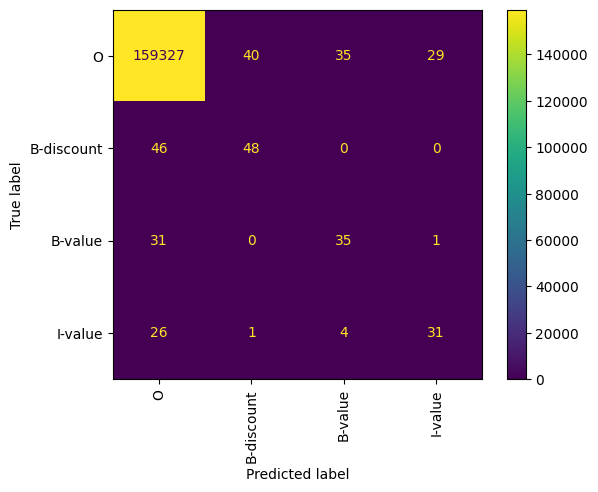

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm =  confusion_matrix( ", ".join(answers["y_true"]).split(", "),
    ", ".join(answers["y_pred"]).split(", "),
    labels=label_list)
cm_display = ConfusionMatrixDisplay(cm, display_labels=label_list)
cm_display.plot(xticks_rotation="vertical")
plt.show()

In [23]:
weights = {"B-discount": 1, "B-value": 2, "I-value": 2, "O": 0.003}

from sklearn.metrics import precision_recall_fscore_support


def weighted_f1(y_true, y_pred, weights):
    """Расчет взвешенной F1 меры с индивидуальными весами для классов."""

    # рассчитываем F1 для всех классов
    _, _, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None, labels=list(weights.keys())
    )

    # вычисление взвешенной F-меры
    weighted_f1 = np.sum(
        f1 * [weights[label] for label in np.unique(y_true + y_pred)] * support
    ) / np.sum(support * [weights[label] for label in np.unique(y_true + y_pred)])
    return weighted_f1


weighted_f1_score = weighted_f1(
    ", ".join(answers["y_true"]).split(", "),
    ", ".join(answers["y_pred"]).split(", "),
    weights,
)
print(weighted_f1_score)

0.7904713904269257
